<a href="https://colab.research.google.com/github/Sudheer-Kumar124/FakeNews_Detection/blob/vineela_channaganu/Decisiontree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
#loading the  Dataset
data=pd.read_excel('/content/fake_job_postings dataset.xlsx')

In [4]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [5]:
data.shape

(17880, 18)

In [6]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15011
company_profile         3308
description               10
requirements            2732
benefits                7241
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3472
required_experience     7049
required_education      8105
industry                4903
function                6455
fraudulent                 1
dtype: int64

In [8]:
# Let us remove the columns which are not necessary
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)


In [9]:

data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0.0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [10]:

# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

In [11]:
# Create independent and dependent features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting
target = "fraudulent"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]

# Convert 'fraudulent' to numeric, handling non-numeric values
Y = pd.to_numeric(Y, errors='coerce').fillna(0).astype(int)
# errors='coerce' will replace non-numeric values with NaN
# fillna(0) will replace NaN with 0
# astype(int) will convert the column to integer type

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

# ... (rest of your code)

# Create DataFrames from resampled data
df1 = pd.DataFrame(X_res, columns=columns)
df3 = pd.DataFrame(y_res, columns=[target])

# Concatenate DataFrames
result = pd.concat([df1, df3], axis=1)

# Assign result to data
data = result
print(data)

(17880, 12)
(17880,)
                                                  title  \
0                       Full-Cycle Oil & Gas Recruiter    
1                                     DevOps / SysAdmin   
2                                     Registered Nurse    
3     Salesforce Developer | Administrator for Rapid...   
4                                Head of Product Design   
...                                                 ...   
1727         Student Positions Part-Time and Full-Time.   
1728                                    Sales Associate   
1729                                  Android Developer   
1730                                     Payroll Clerk    
1731                                    Furniture mover   

                   location           department  \
0           US, TX, Houston                        
1        GR, I, Neo Iraklio                        
2           US, CA, Visalia                        
3     US, CA, Beverly Hills                        
4         

In [12]:

data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

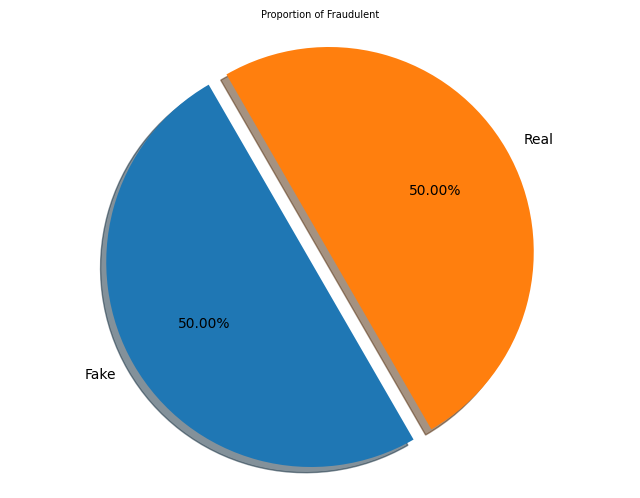

In [13]:
# Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

In [14]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

0       US
1       GR
2       US
3       US
4       SG
        ..
1727    US
1728    AU
1729    PL
1730    US
1731    US
Name: country, Length: 1732, dtype: object

In [15]:
# this will give unique country values
data['country'].nunique()

48

In [16]:
# top 10 country that post jobs
data['country'].value_counts()[:11]

country
US    1225
GB     143
AU      53
GR      47
        31
CA      31
DE      21
NZ      19
IN      19
PH      13
MY      12
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

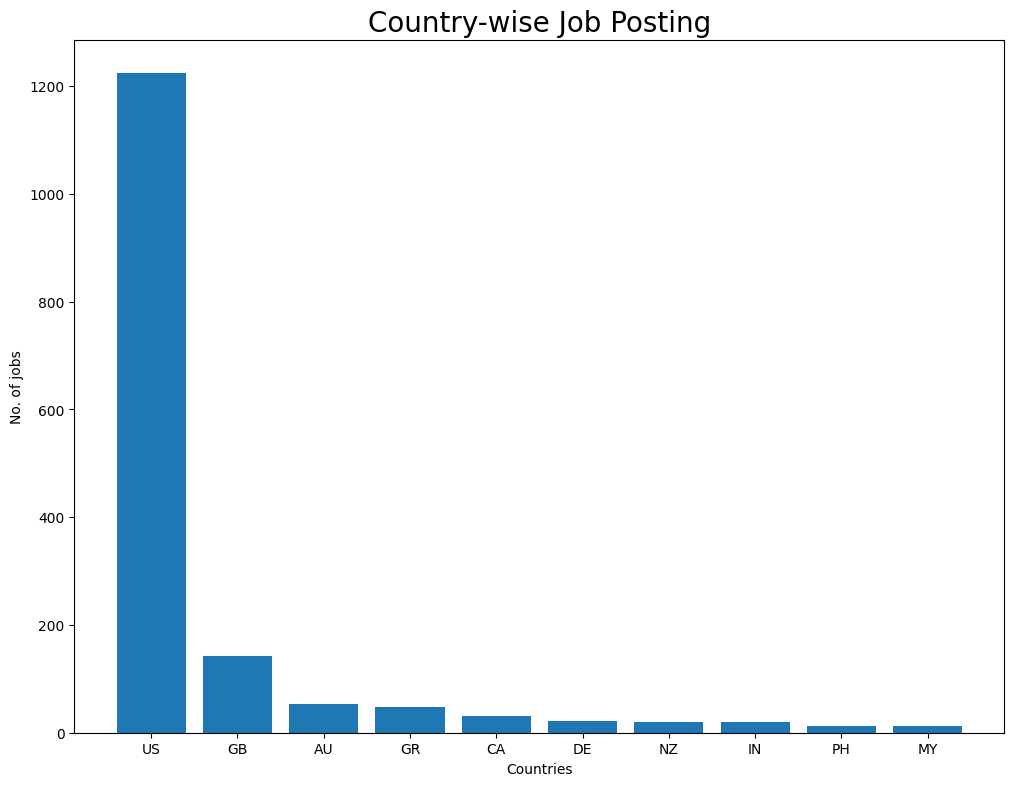

In [17]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [18]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'GR', 'CA', 'DE', 'NZ', 'IN', 'PH', 'MY'])

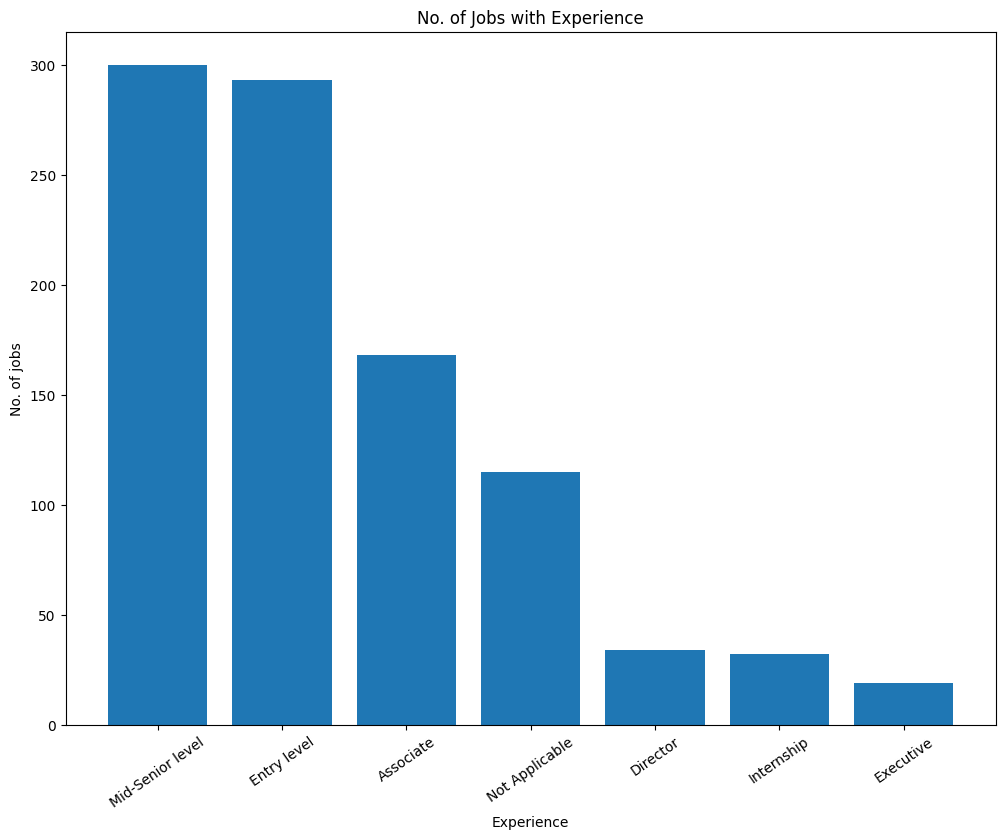

In [19]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [20]:
#Most frequent jobs
print(data.title.value_counts()[:10])


title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         19
Administrative Assistant                                                18
English Teacher Abroad                                                  17
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [21]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [22]:
# For textual type data we will try to create word cloud
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [23]:
data.head()

,fraudulent,text
0,0,"Full-Cycle Oil & Gas Recruiter US, TX, Housto..."
1,0,"DevOps / SysAdmin GR, I, Neo Iraklio Transifex..."
2,0,"Registered Nurse US, CA, Visalia HealthCare C..."
3,0,Salesforce Developer | Administrator for Rapid...
4,0,"Head of Product Design SG, 01, Singapore If wo..."


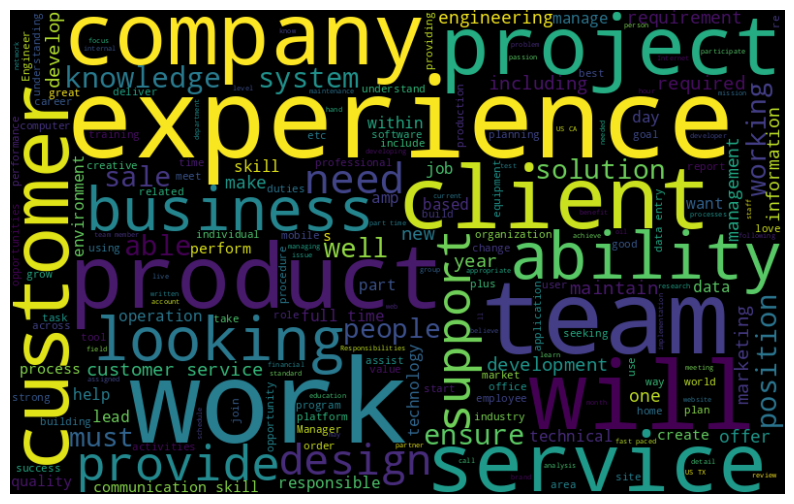

In [24]:
# we will plot a kind of word cloud
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

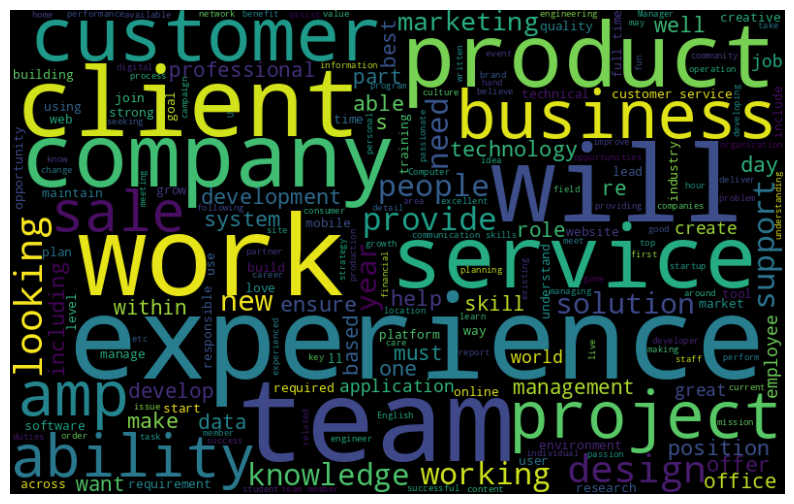

In [25]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


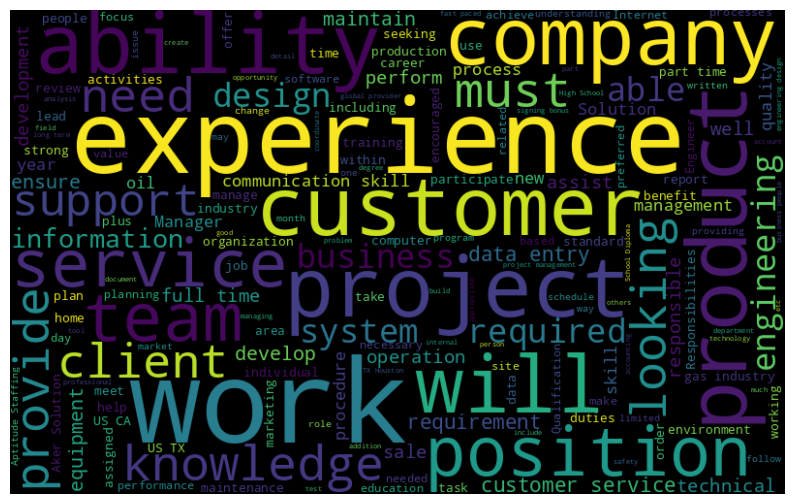

In [26]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
print(stopwords.words("english"))
#loading the stopwords
stop_words = set(stopwords.words("english"))
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))
data['text'][0]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

"full-cycle oil & gas recruiter us, tx, houston valor services provides workforce solutions meet needs companies across private sector, special focus oil &amp; gas industry. valor services involved throughout every step hiring process remain contact way final step signing employment contract new employer. valor services founded vision employing unique skills, experiences, qualities america’s finest veterans provide private sector companies precise concerted value-added services – america’s finest veterans optimized career opportunity.we eager get word veterans ample opportunities employment private sector ideal candidates fill positions. valor services success mission. ™ looking recruiter engage aggressive, full-cycle recruiting. ideal candidate superior skills following: client facing interactions,sourcing strategies, candidate negotiations, recruiting outreach networking, assisting candidate onboarding, etc.additional responsibilities include:develop maintain strong working relations

In [28]:
#IT IS USED TO TRAIN AND TEST THE MODEL.
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)
print(y_train)
print(X_train)

164     0
1622    1
1190    1
1583    1
725     0
       ..
415     0
948     1
507     0
754     0
869     1
Name: fraudulent, Length: 1212, dtype: int64
164     peoplesoft functional lead us, mn, minneapolis...
1622    administrative assistance us, ny, moravia look...
1190    military outreach consultant (telecommute) us,...
1583    assistant accountant/immediate start au, nsw, ...
725     junior ruby rails developer [warszawa] netguru...
                              ...                        
415     outside sales | design consultant us, ca, san ...
948     assistant accountant/immediate start ca, on, t...
507     english teacher abroad us, wi, madison help te...
754     senior account manager/director gb, che, knuts...
869     sales executive pk, sd, karachi sales executiv...
Name: text, Length: 1212, dtype: object


In [29]:

#we need to convert our data into vector format
# we will be using Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
#  instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)
# transform training data
X_train_dtm = vect.transform(X_train)
# examine the document-term matrix
X_train_dtm
#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 303)	1
  (0, 378)	1
  (0, 529)	1
  (0, 579)	1
  (0, 719)	1
  (0, 724)	1
  (0, 727)	1
  (0, 770)	1
  (0, 778)	1
  (0, 795)	1
  (0, 1067)	1
  (0, 1103)	2
  (0, 1146)	1
  (0, 1164)	20
  (0, 1178)	4
  (0, 1193)	1
  (0, 1377)	8
  (0, 1382)	2
  (0, 1427)	1
  (0, 1451)	1
  (0, 1504)	1
  (0, 1763)	1
  (0, 2043)	1
  (0, 2051)	1
  (0, 2147)	1
  :	:
  (1210, 17952)	1
  (1210, 18058)	2
  (1210, 18062)	1
  (1210, 18079)	1
  (1210, 18091)	1
  (1210, 18159)	1
  (1210, 18355)	1
  (1210, 18535)	1
  (1210, 18589)	1
  (1210, 19080)	2
  (1210, 19096)	2
  (1210, 19119)	1
  (1210, 19246)	1
  (1210, 19308)	1
  (1210, 19373)	1
  (1210, 19621)	1
  (1210, 19645)	1
  (1210, 19784)	2
  (1210, 19822)	2
  (1210, 20032)	1
  (1211, 6612)	4
  (1211, 9702)	1
  (1211, 13125)	1
  (1211, 15566)	4
  (1211, 15791)	1


In [30]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm


<520x20290 sparse matrix of type '<class 'numpy.int64'>'
	with 81409 stored elements in Compressed Sparse Row format>

In [31]:
#MODEL BULIDING AND EVALUATION OF MODEL
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#train the model
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 576 ms, sys: 1.73 ms, total: 578 ms
Wall time: 605 ms


DecisionTreeClassifier()

CPU times: user 360 ms, sys: 0 ns, total: 360 ms
Wall time: 359 ms
Classification Accuracy: 0.8288461538461539
Classification Report

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       254
           1       0.82      0.85      0.84       266

    accuracy                           0.83       520
   macro avg       0.83      0.83      0.83       520
weighted avg       0.83      0.83      0.83       520

Confusion Matrix

[[204  50]
 [ 39 227]]


Text(95.72222222222221, 0.5, 'Truth')

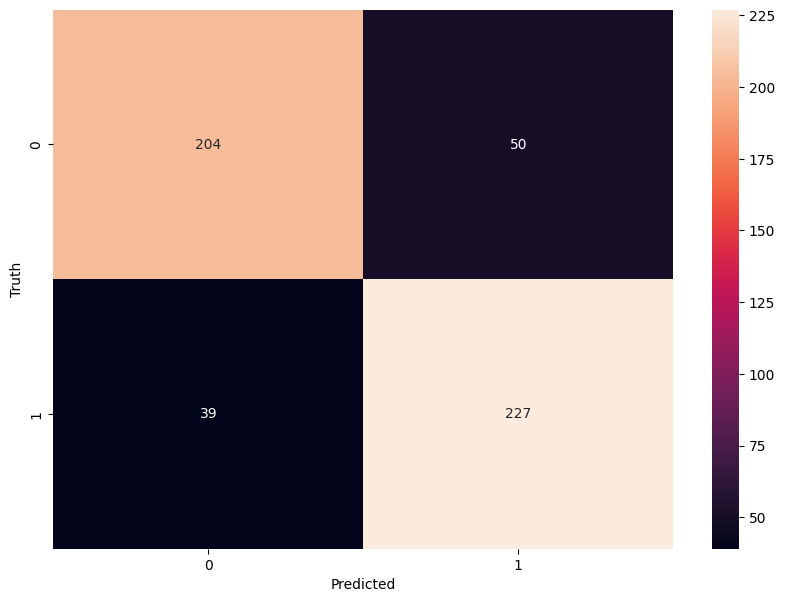

In [32]:
#MODEL BULIDING AND EVALUATION OF MODEL
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary functions

dt = DecisionTreeClassifier()
#train the model
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)
# Performing the  Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class)) # Now accuracy_score is defined
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))
# Confusion Matrix as showing  in the form of the graph.

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
#EXAMPLE TAKING ONE JOB POSTING AND DETECTING WHETHER IT IS A FAKE ONE OR REAL ONE..
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping & receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [34]:
#EXAMPLE 2
input_text=[" "]
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[1]
Fraudulant Job
